In [1]:
import numpy as np
import pandas as pd

file_path = "C:\\Users\\cwk05\\Desktop\\DDM\\5003\\HW5\\HSI.csv" 
df = pd.read_csv(file_path).dropna() # read data using pandas and remove rows with null data

ret = np.abs(np.log(df['Adj Close'].shift(-1)/df['Adj Close'])).dropna() # absolute return
mu = ret.mean() # average of absolute return
cs = (ret-mu).cumsum() # cumulative sum

T = len(cs)
logtaumax = int((round(np.log10(T-7, ), 1) - round(np.log10(7, ), 1)) / 0.1) + 2  # maximum τ used
x = np.arange(logtaumax)*0.1 + round(np.log10(7, ), 1)

epsilons = []
taus = []
for i in x:
    tau = int(10 ** i)
    epsilon = 0
    xx = np.arange(tau)
    xx_mean = (tau-1)/2
    xx2_mean = (tau-1)*(2*tau-1)/6
    for j in range(T-tau+1):  # sliding windows
        yy = cs.iloc[j:j+tau]
        yy_mean = yy.mean()
        yy2_mean = (yy**2).mean()
        xy_mean = np.dot(xx, yy) / tau
        epsilon += np.sqrt(yy2_mean - yy_mean**2 - (xy_mean - xx_mean * yy_mean)**2 / (xx2_mean - xx_mean**2))
    epsilons.append(epsilon/(T-tau+1))
    taus.append(tau)
    

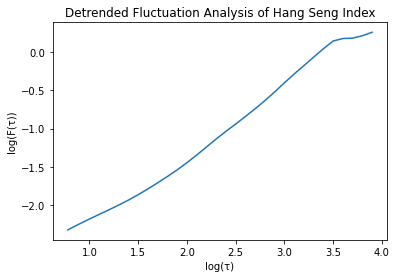

In [2]:
# Plot F(τ) versus τ using logarithmic scales for both axes
import matplotlib.pyplot as plt
plt.plot(np.log10(taus),np.log10(epsilons))
plt.xlabel('log(\u03C4)')
plt.ylabel('log(F(\u03C4))')
plt.title('Detrended Fluctuation Analysis of Hang Seng Index')
plt.show()

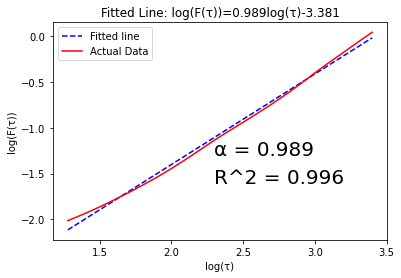

In [19]:
# discard the upper and lower parts of the data points that deviate from the power law and obtain the value of α
from scipy.optimize import curve_fit

def linear_function(x, m, b):
    return m*x+b

m = 1
b = 0
x1 = 5
x2 = len(taus) - x1
m_fit, b_fit  = curve_fit(linear_function, np.log10(taus)[x1:x2], np.log10(epsilons)[x1:x2], p0=[m, b])[0]

# Calculate R^2
residuals = np.log10(epsilons)[x1:x2] - linear_function(np.log10(taus)[x1:x2], m_fit, b_fit)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((np.log10(epsilons)[x1:x2]-np.mean(np.log10(epsilons)[x1:x2]))**2)
r_squared = 1 - (ss_residuals / ss_total)

# Plotting
plt.plot(np.log10(taus)[x1:x2], linear_function(np.log10(taus)[x1:x2], m_fit, b_fit), 'b--', label='Fitted line')
plt.plot(np.log10(taus)[x1:x2], np.log10(epsilons)[x1:x2], 'r-', label='Actual Data')
plt.xlabel('log(\u03C4)')
plt.ylabel('log(F(\u03C4))')
plt.legend()
plt.title(f'Fitted Line: log(F(\u03C4))={m_fit:.3f}log(\u03C4){b_fit:.3f}')
plt.text(2.3,-1.3,f'\u03B1 = {m_fit:.3f}', fontsize=20)
plt.text(2.3,-1.6,f'R^2 = {r_squared:.3f}', fontsize=20)
plt.show()
